<a href="https://colab.research.google.com/github/life-ofpi/2023_SDA/blob/main/SDA_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
data=pd.read_csv("student-mat.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


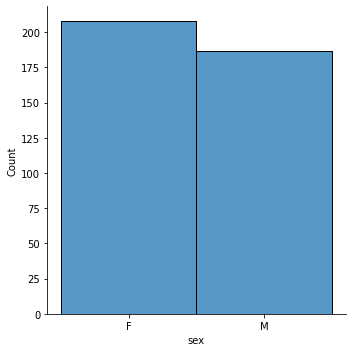

In [ ]:
sns.displot(data['sex'])

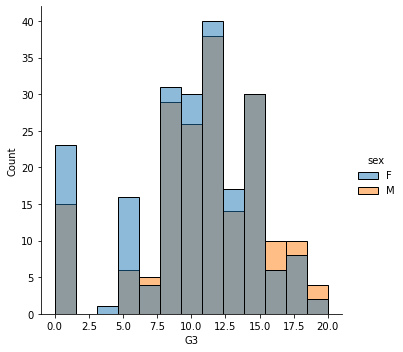

In [ ]:
sns.displot(data,x='G3',hue='sex')

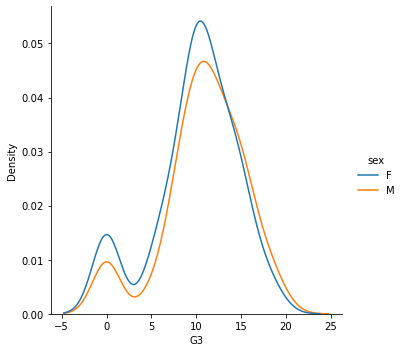

In [ ]:
sns.displot(data,x='G3',hue='sex',kind='kde')

<AxesSubplot:xlabel='sex', ylabel='G3'>

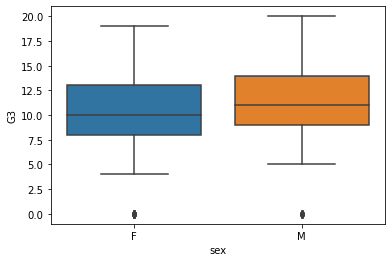

In [ ]:
sns.boxplot(data=data,x='sex',y='G3')

In [ ]:
data_m = data[data['sex'] == 'M']
data_w = data[data['sex'] == 'F']


In [ ]:
print(data_m['G3'].mean())
print(data_w['G3'].mean())
print(data_m[data_m['G3']>0]['G3'].mean()) #이상치 제거
print(data_w[data_w['G3']>0]['G3'].mean())


10.914438502673796
9.966346153846153
11.866279069767442
11.205405405405406


In [ ]:
from scipy.stats import bartlett
stat,p=bartlett(data_m[data_m["G3"]>0]['G3'],data_w[data_w["G3"]>0]['G3'])
print(stat,p)
#등분산성 ok.

0.1214772696636538 0.7274377618424044


In [ ]:
stats.ttest_ind(data_m[data_m['G3']>0]['G3'],data_w[data_w['G3']>0]['G3'],equal_var=True)
#t-test를 하기 위한 조건 체크 필요.

Ttest_indResult(statistic=1.9404771273257526, pvalue=0.053113174845791505)

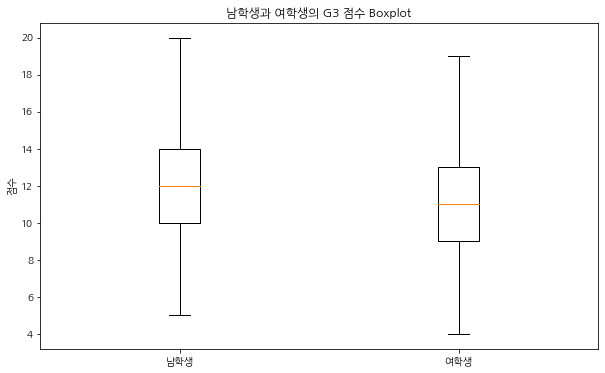

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.family"]="NanumGothic"

# 남학생과 여학생의 'G3' 점수에 대한 boxplot
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.boxplot([data_m[data_m['G3']>0]['G3'], data_w[data_w['G3']>0]['G3']] ,labels=['남학생', '여학생'])
plt.title('남학생과 여학생의 G3 점수 Boxplot')
plt.ylabel('점수')
plt.show()


In [ ]:
print("남학생 정규성 검정:", stats.shapiro(data_m[data_m['G3']>0]['G3']))
print("여학생 정규성 검정:", stats.shapiro(data_w[data_w['G3']>0]['G3']))

남학생 정규성 검정: ShapiroResult(statistic=0.9788141846656799, pvalue=0.00993412546813488)
여학생 정규성 검정: ShapiroResult(statistic=0.9785575270652771, pvalue=0.006042678374797106)


In [ ]:
#t-test최종 검증 진행
t_stat, p_val=stats.ttest_ind(data_m[data_m['G3']>0]['G3'],data_w[data_w['G3']>0]['G3'],equal_var=True)

print(f"t-검정 결과: statistic={t_stat}, p-value={p_val}")


t-검정 결과: statistic=1.9404771273257526, p-value=0.053113174845791505


## 포르투갈 언어 data


In [ ]:
por_data=pd.read_csv("student-por.csv")
por_data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


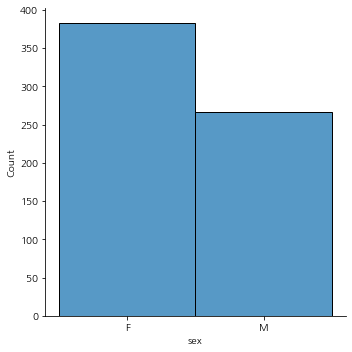

In [ ]:
sns.displot(por_data['sex'])

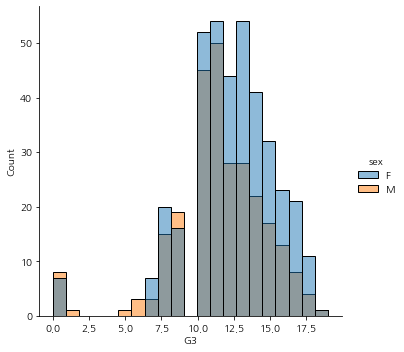

In [ ]:
sns.displot(por_data,x='G3',hue='sex')

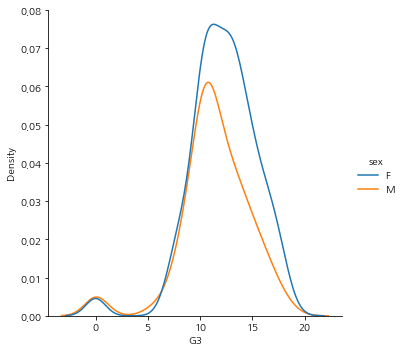

In [ ]:
sns.displot(por_data,x='G3',hue='sex',kind='kde')

<AxesSubplot:xlabel='sex', ylabel='G3'>

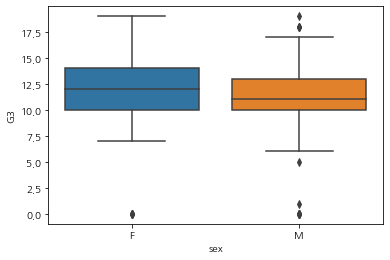

In [ ]:
#이상치 체크
sns.boxplot(data=por_data,x='sex',y='G3')

In [ ]:
pordata_m = por_data[por_data['sex'] == 'M']
pordata_w = por_data[por_data['sex'] == 'F']


In [ ]:
#각각 이상치제거
# 남학생 데이터에서 'G3'점수의 이상치 제거
Q1_m = pordata_m['G3'].quantile(0.25)
Q3_m = pordata_m['G3'].quantile(0.75)
IQR_m = Q3_m - Q1_m
lower_bound_m = Q1_m - 1.5 * IQR_m
upper_bound_m = Q3_m + 1.5 * IQR_m
pordata_m_filtered = pordata_m[(pordata_m['G3'] >= lower_bound_m) & (pordata_m['G3'] <= upper_bound_m)]

# 여학생 데이터에서 'G3'점수의 이상치 제거
Q1_w = pordata_w['G3'].quantile(0.25)
Q3_w = pordata_w['G3'].quantile(0.75)
IQR_w = Q3_w - Q1_w
lower_bound_w = Q1_w - 1.5 * IQR_w
upper_bound_w = Q3_w + 1.5 * IQR_w
pordata_w_filtered = pordata_w[(pordata_w['G3'] >= lower_bound_w) & (pordata_w['G3'] <= upper_bound_w)]


In [ ]:
print(pordata_m_filtered['G3'].mean())
print(pordata_w_filtered['G3'].mean())

11.701195219123505
12.481382978723405


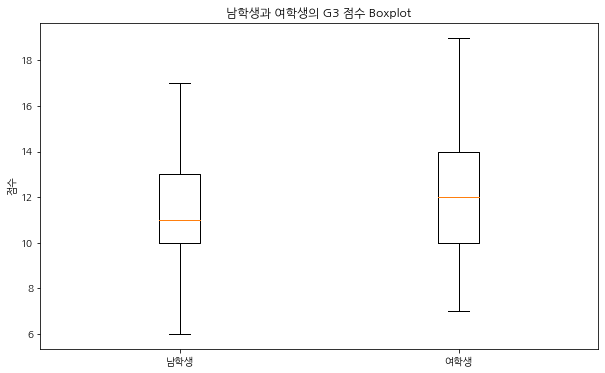

In [ ]:
import matplotlib as mpl
mpl.rcParams["font.family"]="NanumGothic"

# 남학생과 여학생의 'G3' 점수에 대한 boxplot 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.boxplot([pordata_m_filtered['G3'], pordata_w_filtered['G3']], labels=['남학생', '여학생'])
plt.title('남학생과 여학생의 G3 점수 Boxplot')
plt.ylabel('점수')
plt.show()
#여학생이 더 높은 box분포가지고 있음

In [ ]:
# 남학생 정규성 검정
statistic, p_value = stats.shapiro(pordata_m_filtered['G3'])
print(f"남학생 정규성 검정: statistic={statistic}, p-value={p_value}")

# 여학생 정규성 검정
statistic, p_value = stats.shapiro(pordata_w_filtered['G3'])
print(f"여학생 정규성 검정: statistic={statistic}, p-value={p_value}")



남학생 정규성 검정: statistic=0.9676920771598816, p-value=1.873389737738762e-05
여학생 정규성 검정: statistic=0.9747235178947449, p-value=3.883808858518023e-06


In [ ]:
# 등분산성 검정. <0.05.
stat, p = bartlett(pordata_m_filtered['G3'], pordata_w_filtered['G3'])
print(f"Bartlett 등분산성 검정: statistic={stat}, p-value={p}")

Bartlett 등분산성 검정: statistic=2.4197166924778375, p-value=0.11981659786763585


In [ ]:
t_stat, p_val = stats.ttest_ind(pordata_m_filtered['G3'], pordata_w_filtered['G3'], equal_var=True)
print(f"t-test: statistic={t_stat}, p-value={p_val}")
#0.05보다 pvalue가 현저히 낮으므로 남녀의 그룹차이가 유의미하다.

t-test: statistic=-3.720675331801623, p-value=0.0002165879208240936
